In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ta.trend import EMAIndicator, SMAIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import AverageTrueRange
import mplfinance as mpf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
print("************ ALGO-TRADING MARKET ANALYTICS SYSTEM ************")
# Loading the DataSet
df = yf.download("RELIANCE.NS", start="2018-01-01", end="2024-01-01")
# Representing first 5 rows in a dataset
print(df.head())
print("\nDataset shape:", df.shape)
# Save raw dataset
df.to_csv("raw_stock_data.csv")
print("Raw stock data saved as 'raw_stock_data.csv'")

[*********************100%***********************]  1 of 1 completed

************ ALGO-TRADING MARKET ANALYTICS SYSTEM ************
Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2018-01-01  401.864807  407.585208  400.870911  407.585208     9453202
2018-01-02  402.483246  406.193799  400.385024  403.300454     9499419
2018-01-03  404.095551  409.042944  403.322514  408.601196    13507800
2018-01-04  406.525055  407.187662  404.493091  405.575331     9008932
2018-01-05  407.828186  409.440517  406.503001  407.187694     7441284

Dataset shape: (1481, 5)
Raw stock data saved as 'raw_stock_data.csv'


In [30]:
# Data Cleaning

# Load raw dataset
df = pd.read_csv("raw_stock_data.csv", index_col=0)
print(" ")

print("Basic info about the Data Set")
print(df.info())
print(" ")

# Check for missing values
print(df.isnull().sum())
print(" ")

#check for data types
print(df.dtypes)
print(" ")

#check for duplicate values
print(df.duplicated().sum())
print(" ")

print("Handling Missing values")
print(df.ffill(inplace=True))

# Save cleaned data
df.to_csv("cleaned_stock_data.csv")
print("Cleaned dataset saved as 'cleaned_stock_data.csv'")


 
Basic info about the Data Set
<class 'pandas.core.frame.DataFrame'>
Index: 1483 entries, Ticker to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1482 non-null   object
 1   High    1482 non-null   object
 2   Low     1482 non-null   object
 3   Open    1482 non-null   object
 4   Volume  1482 non-null   object
dtypes: object(5)
memory usage: 69.5+ KB
None
 
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
 
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
 
0
 
Handling Missing values
None
Cleaned dataset saved as 'cleaned_stock_data.csv'


In [32]:
#Convert columns to numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High']  = pd.to_numeric(df['High'], errors='coerce')
df['Low']   = pd.to_numeric(df['Low'], errors='coerce')
df['Open']  = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Droping any rows with NaNs created during conversion
print(df.dropna(inplace=True))


None


**********Feature Engineering***************


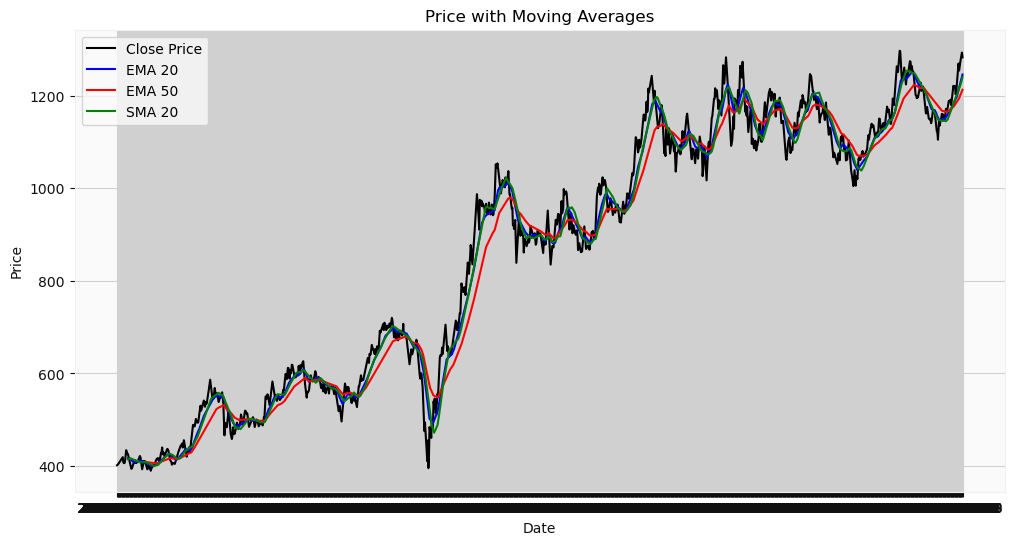

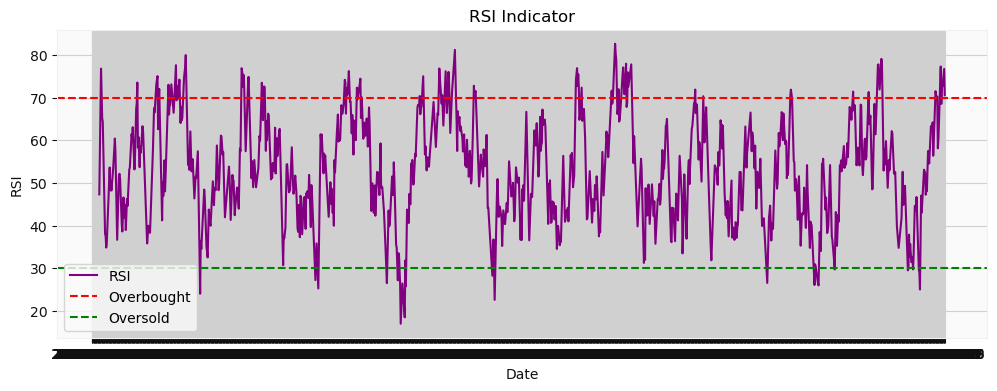

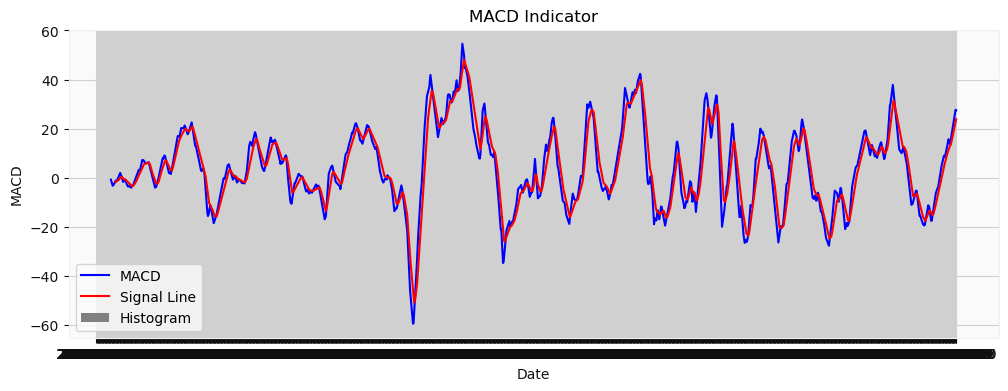

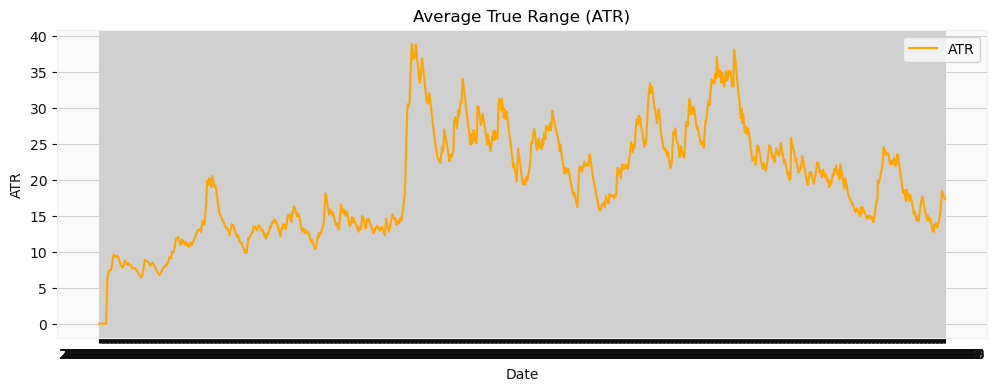

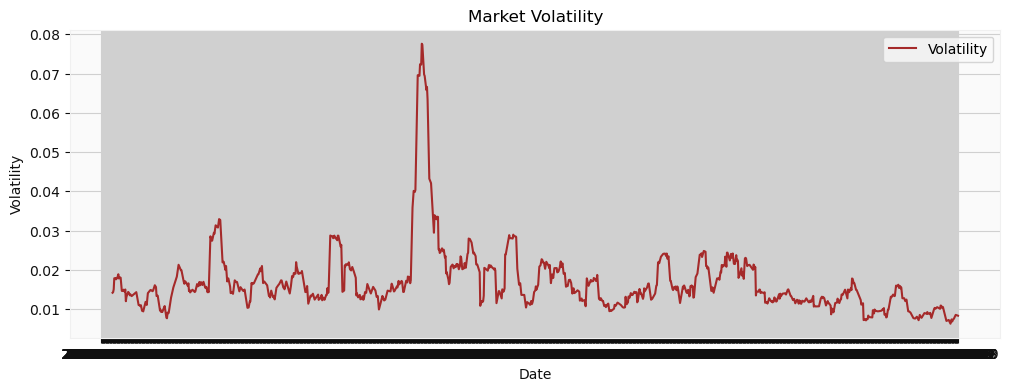

                 Close      EMA_20      EMA_50      SMA_20        RSI  \
Price                                                                   
2018-03-14  410.390228  408.897647  408.839640  409.909830  51.121662   
2018-03-15  402.770294  408.314089  408.601626  409.427235  45.157541   
2018-03-16  397.580048  407.291800  408.169408  408.640955  41.597688   
2018-03-19  395.570160  406.175453  407.675319  408.071120  40.273677   
2018-03-20  393.052307  404.925630  407.101868  407.249500  38.615513   

                MACD       ATR  Volatility  
Price                                       
2018-03-14 -0.553772  8.126962    0.013622  
2018-03-15 -0.971738  8.160155    0.013508  
2018-03-16 -1.702168  8.389750    0.013735  
2018-03-19 -2.415376  8.260609    0.013391  
2018-03-20 -3.147487  8.205375    0.013314  


In [34]:
print("**********Feature Engineering***************")

# EMA
df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
df['EMA_50'] = EMAIndicator(df['Close'], window=50).ema_indicator()
# SMA
df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
#VisualiZation
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['EMA_20'], label='EMA 20', color='blue')
plt.plot(df['EMA_50'], label='EMA 50', color='red')
plt.plot(df['SMA_20'], label='SMA 20', color='green')
plt.legend()
plt.title('Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# RSI
df['RSI'] = RSIIndicator(df['Close'], window=14).rsi()
#VisualiZation
plt.figure(figsize=(12,4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

# MACD
macd = MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['MACD_hist'] = macd.macd_diff()
#VisualiZation
plt.figure(figsize=(12,4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='red')
plt.bar(df.index, df['MACD_hist'], label='Histogram', color='grey')
plt.legend()
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.show()

# ATR
atr = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['ATR'] = atr.average_true_range()
#VisualiZation
plt.figure(figsize=(12,4))
plt.plot(df['ATR'], label='ATR', color='orange')
plt.legend()
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.show()


# Volatility
df['Volatility'] = df['Close'].pct_change().rolling(20).std()
#VisualiZation
plt.figure(figsize=(12,4))
plt.plot(df['Volatility'], label='Volatility', color='brown')
plt.legend()
plt.title('Market Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


# Drop NaNs in the data
df.dropna(inplace=True)

# Checking the final dataset
print(df[['Close','EMA_20','EMA_50','SMA_20','RSI','MACD','ATR','Volatility']].head())

Dataset Shape: (1432, 14)
                 Close        High         Low        Open      Volume  \
Price                                                                    
2018-03-14  410.390228  411.715413  406.039184  410.279799  14724464.0   
2018-03-15  402.770294  410.566860  401.975201  408.601154  12711836.0   
2018-03-16  397.580048  401.842749  391.395812  401.533516  30814962.0   
2018-03-19  395.570160  400.605868  394.024086  397.999670  12630833.0   
2018-03-20  393.052307  399.324886  391.837552  394.598381  15192983.0   

                EMA_20      EMA_50      SMA_20        RSI      MACD  \
Price                                                                 
2018-03-14  408.897647  408.839640  409.909830  51.121662 -0.553772   
2018-03-15  408.314089  408.601626  409.427235  45.157541 -0.971738   
2018-03-16  407.291800  408.169408  408.640955  41.597688 -1.702168   
2018-03-19  406.175453  407.675319  408.071120  40.273677 -2.415376   
2018-03-20  404.925630  407.1

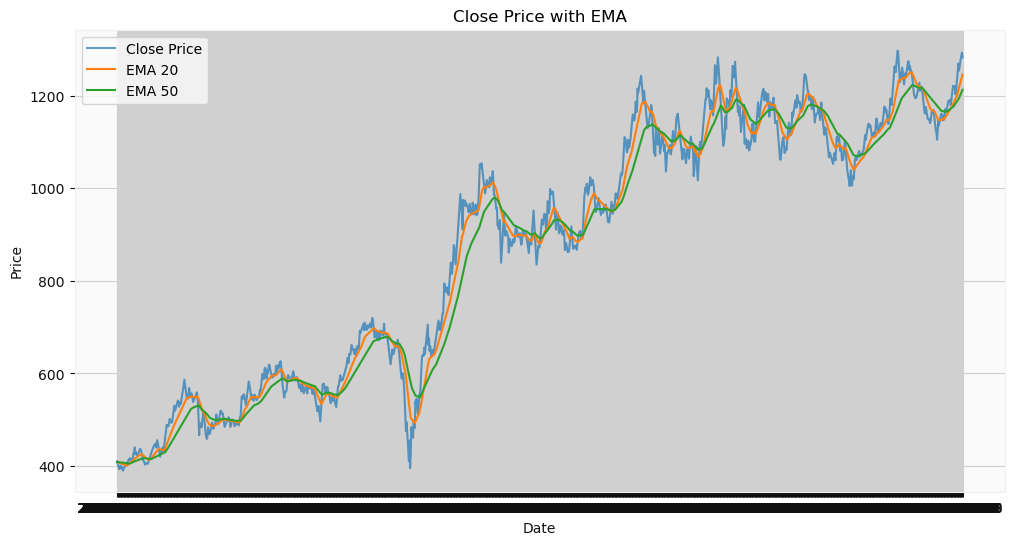

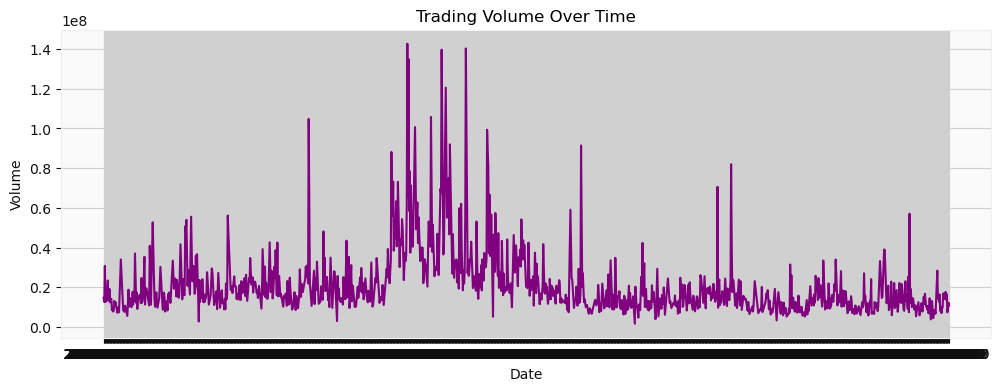

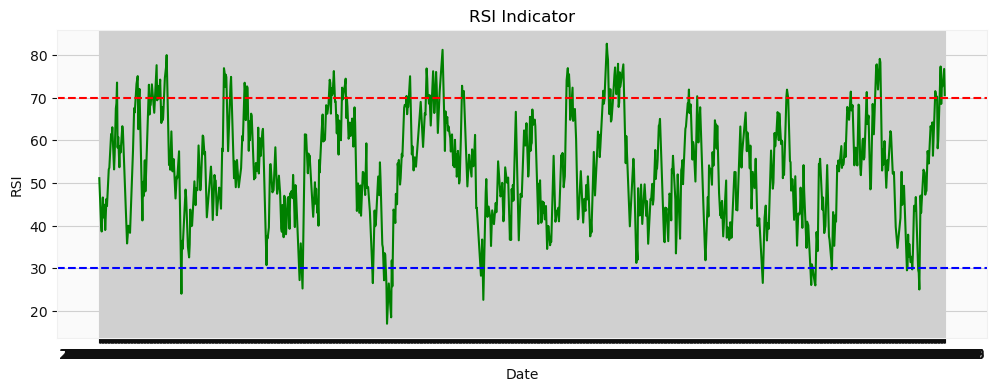

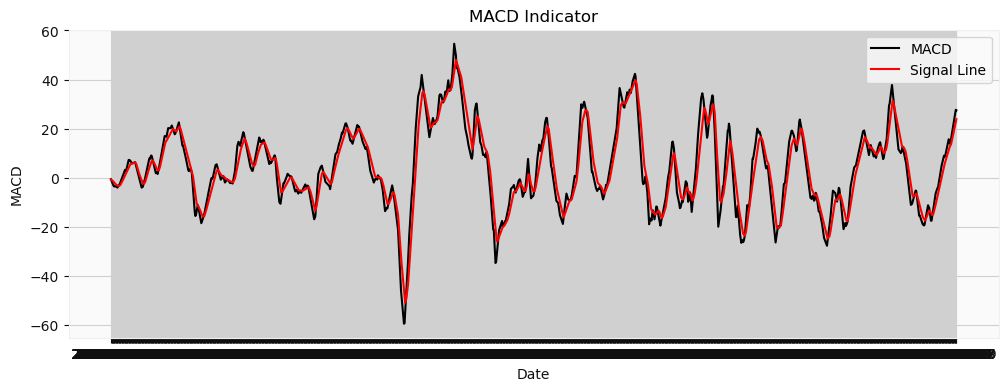

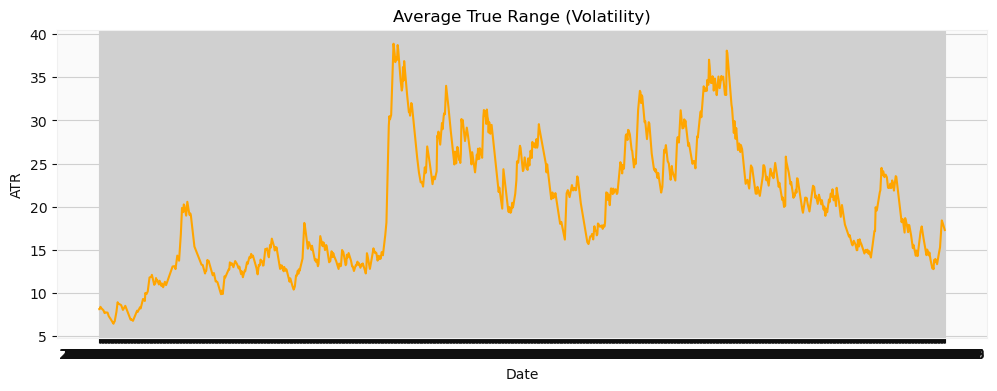

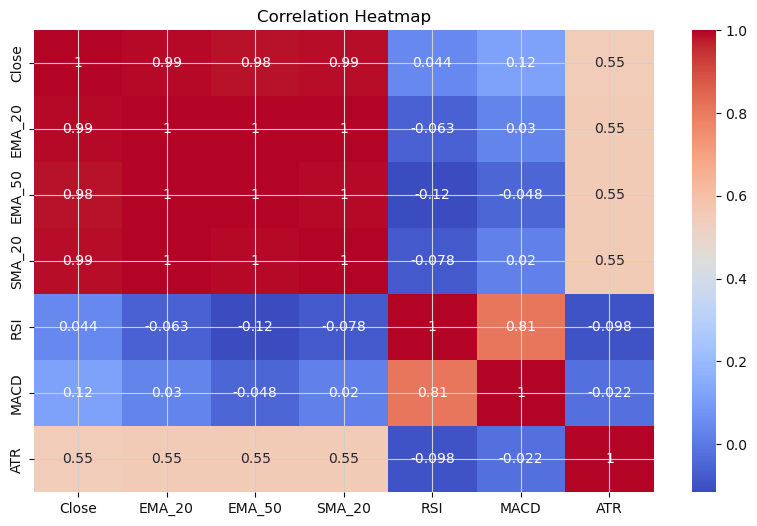

In [35]:
#Exploratory Data Analysis (EDA)

print("Dataset Shape:", df.shape)
print(df.head())

# ================================
# 1️⃣ Price Trend Analysis
# ================================
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', alpha=0.7)
plt.plot(df['EMA_20'], label='EMA 20')
plt.plot(df['EMA_50'], label='EMA 50')
plt.title("Close Price with EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.savefig("close_price_EMA.png", dpi=300)
plt.show()

# ================================
# 2️⃣ Volume Analysis
# ================================
plt.figure(figsize=(12,4))
plt.plot(df['Volume'], color='purple')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.savefig("Trading Volume Over Time.png", dpi=300)
plt.show()

# ================================
# 3️⃣ RSI Analysis
# ================================
plt.figure(figsize=(12,4))
plt.plot(df['RSI'], color='green')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='blue', linestyle='--')
plt.title("RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.savefig("RSI Indicator.png", dpi=300)
plt.show()

# ================================
# 4️⃣ MACD Analysis
# ================================
plt.figure(figsize=(12,4))
plt.plot(df['MACD'], label='MACD', color='black')
plt.plot(df['MACD_signal'], label='Signal Line', color='red')
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.savefig("MACD Indicator.png", dpi=300)
plt.show()

# ================================
# 5️⃣ Volatility Analysis (ATR)
# ================================
plt.figure(figsize=(12,4))
plt.plot(df['ATR'], color='orange')
plt.title("Average True Range (Volatility)")
plt.xlabel("Date")
plt.ylabel("ATR")
plt.savefig("Average True Range.png", dpi=300)
plt.show()

# ================================
# 6️⃣ Correlation Heatmap
# ================================
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['Close','EMA_20','EMA_50','SMA_20','RSI','MACD','ATR']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.savefig("Correlation Heatmap.png", dpi=300)
plt.show()


df.index = pd.to_datetime(df.index)
df_recent = df.tail(200)   # last 200 trading days

mpf.plot(
    df_recent,
    type='candle',
    volume=True,
    style='yahoo',
    title='Candlestick Analysis (Last 200 Days)',
    savefig='candlestick_last_200_days.png'
)



In [37]:
# Creating Lag Features
for lag in [1,2,3]:
    df[f'RSI_lag{lag}'] = df['RSI'].shift(lag)
    df[f'MACD_lag{lag}'] = df['MACD'].shift(lag)
    df[f'Volatility_lag{lag}'] = df['Volatility'].shift(lag)

# Creating Target Variable (threshold-based)
threshold = 0.003   # 0.3%
df['Target'] = (df['Close'].pct_change().shift(-1) > threshold).astype(int)

df.dropna(inplace=True)

# printing the first 10 rows to understand the target
print(df[['Close','Target']].head(10))
print("\nTarget distribution (proportion):")
print(df['Target'].value_counts(normalize=True))

# Feature Selection 
features = ['EMA_20','EMA_50','SMA_20','RSI','MACD','ATR','Volatility',
            'RSI_lag1','RSI_lag2','RSI_lag3',
            'MACD_lag1','MACD_lag2','MACD_lag3',
            'Volatility_lag1','Volatility_lag2','Volatility_lag3']

X = df[features]
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Scaleing the  Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


                 Close  Target
Price                         
2018-03-19  395.570160       0
2018-03-20  393.052307       1
2018-03-21  396.188538       1
2018-03-22  401.158051       0
2018-03-23  394.863403       1
2018-03-26  398.043793       0
2018-03-27  397.469574       0
2018-03-28  389.915985       1
2018-04-02  394.443726       1
2018-04-03  397.359161       0

Target distribution (proportion):
Target
0    0.571029
1    0.428971
Name: proportion, dtype: float64


In [42]:

# Model1: Random Forest 
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


# Probability Threshold for Confident Trades
proba_rf = rf.predict_proba(X_test)[:,1]
threshold_trade = 0.55  
y_pred_conf = (proba_rf > threshold_trade).astype(int)

# Model 2: XGBoost
# -----------------------------
xgb = XGBClassifier(n_estimators=500, max_depth=6, scale_pos_weight=(y_train==0).sum() / (y_train==1).sum(),
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


# Model 3: Logistic Regression
# -----------------------------
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
#Model 4 SVM:
#----------------
svm = SVC(
    kernel='rbf',
    probability=True,
    class_weight='balanced',
    random_state=42
)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Random Forest Accuracy: 0.5209790209790209

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60       178
           1       0.38      0.42      0.40       108

    accuracy                           0.52       286
   macro avg       0.50      0.50      0.50       286
weighted avg       0.53      0.52      0.52       286



C:\Users\manasa\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:09:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.5174825174825175
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       178
           1       0.37      0.41      0.39       108

    accuracy                           0.52       286
   macro avg       0.50      0.50      0.50       286
weighted avg       0.53      0.52      0.52       286


Logistic Regression Accuracy: 0.6013986013986014
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       178
           1       0.29      0.04      0.07       108

    accuracy                           0.60       286
   macro avg       0.45      0.49      0.41       286
weighted avg       0.49      0.60      0.49       286


SVM Accuracy: 0.479020979020979
              precision    recall  f1-score   support

           0       0.61      0.44      0.51       178
           1       0.37      0.54      0.44       108

    accuracy                           0.48       286
   macr

In [19]:

#----------------Trading Strategy Simulation-----------------------

# 1. MOVING AVERAGE STRATEGY

df = df.copy()
# Calculate moving averages
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()

# Generating signals
# Buy = 1, Sell = -1, Hold = 0
df['Signal'] = 0
df.loc[df['SMA_10'] > df['SMA_30'], 'Signal'] = 1
df.loc[df['SMA_10'] < df['SMA_30'], 'Signal'] = -1

df['Position'] = df['Signal'].shift(1)

# 2. BACKTESTING
# Daily returns
df['Market_Return'] = df['Close'].pct_change()

# Strategy returns
df['Strategy_Return'] = df['Position'] * df['Market_Return']

# Cumulative returns
df['Cumulative_Market_Return'] = (1 + df['Market_Return']).cumprod()
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()


#  PERFORMANCE METRICS
# Profit / Loss
total_profit = df['Cumulative_Strategy_Return'].iloc[-1] - 1

# Drawdown
rolling_max = df['Cumulative_Strategy_Return'].cummax()
drawdown = (df['Cumulative_Strategy_Return'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Trades
df['Trade'] = df['Position'].diff()
number_of_trades = df['Trade'].abs().sum()

# Win ratio
winning_trades = df[df['Strategy_Return'] > 0].shape[0]
total_trades = df[df['Strategy_Return'] != 0].shape[0]
win_ratio = winning_trades / total_trades if total_trades > 0 else 0

# Accuracy 
df['Actual_Direction'] = np.where(df['Market_Return'] > 0, 1, 0)
df['Predicted_Direction'] = np.where(df['Position'] == 1, 1, 0)
accuracy = (df['Actual_Direction'] == df['Predicted_Direction']).mean()

# RESULTS
print("************ TRADING STRATEGY RESULTS ************")
print(f"Strategy Accuracy        : {accuracy:.2f}")
print(f"Total Profit / Loss      : {total_profit:.2%}")
print(f"Maximum Drawdown         : {max_drawdown:.2%}")
print(f"Number of Trades         : {int(number_of_trades)}")
print(f"Win Ratio                : {win_ratio:.2%}")


************ TRADING STRATEGY RESULTS ************
Strategy Accuracy        : 0.52
Total Profit / Loss      : 64.62%
Maximum Drawdown         : -44.24%
Number of Trades         : 93
Win Ratio                : 52.01%


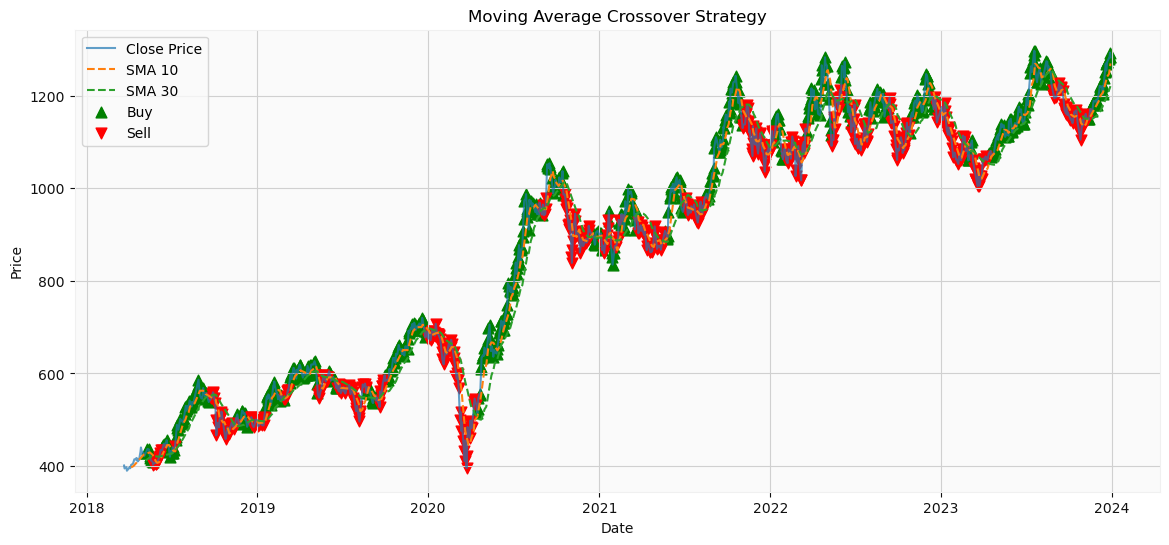

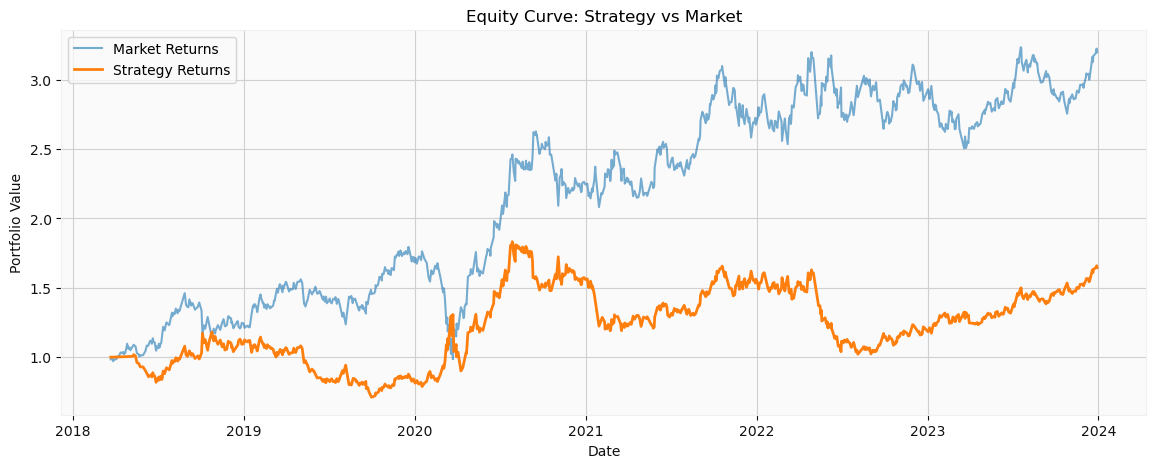

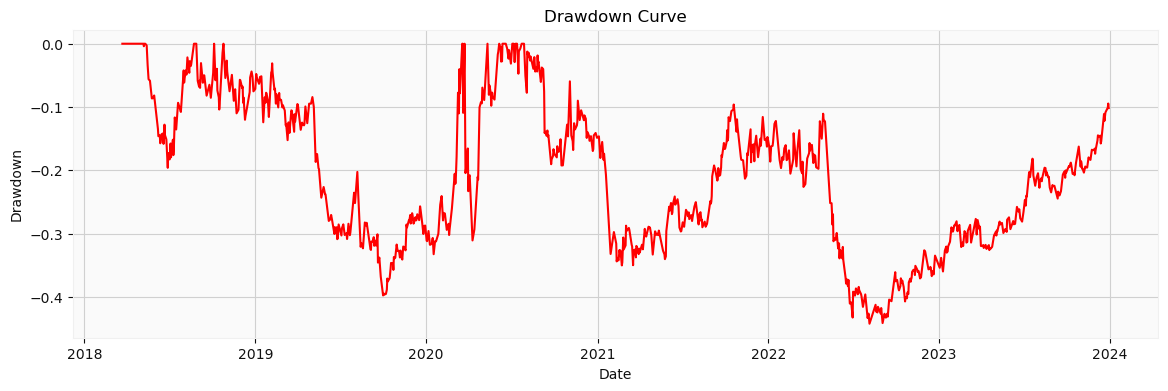

In [21]:
#--------------------Visualization----------------------------
#1. Price + Moving Average Crossover (with Buy/Sell)
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
plt.plot(df.index, df['SMA_10'], label='SMA 10', linestyle='--')
plt.plot(df.index, df['SMA_30'], label='SMA 30', linestyle='--')

# Buy signals
plt.scatter(df.index[df['Signal'] == 1],
            df['Close'][df['Signal'] == 1],
            label='Buy', marker='^', color='green', s=60)

# Sell signals
plt.scatter(df.index[df['Signal'] == -1],
            df['Close'][df['Signal'] == -1],
            label='Sell', marker='v', color='red', s=60)

plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.savefig("ma_crossover_strategy.png", dpi=300, bbox_inches='tight')
plt.show()
#2. Equity Curve
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Cumulative_Market_Return'], label='Market Returns', alpha=0.6)
plt.plot(df.index, df['Cumulative_Strategy_Return'], label='Strategy Returns', linewidth=2)

plt.title('Equity Curve: Strategy vs Market')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)

plt.savefig("equity_curve.png", dpi=300, bbox_inches='tight')
plt.show()
#3. Drawdown Curve
plt.figure(figsize=(14,4))
plt.plot(df.index, drawdown, color='red')

plt.title('Drawdown Curve')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)

plt.savefig("drawdown_curve.png", dpi=300, bbox_inches='tight')
plt.show()
